In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
data=pd.read_csv("../input/stack-overflow-developer-survey-results-2019/survey_results_public.csv")
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
df=pd.read_csv("../input/stack-overflow-developer-survey-results-2019/survey_results_schema.csv")
df.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [32]:
data.columns   #Seeing the available Features.

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'YearsCode',
       'CurrencySymbol', 'WorkWeekHrs', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'SocialMedia', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents', 'SurveyLength', 'SurveyEase'],
      dtype='object')

In [31]:
data.info()   #Getting an info about the columns to see instances of missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 23 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
YearsCode                 87938 non-null object
CurrencySymbol            71392 non-null object
WorkWeekHrs               64503 non-null float64
LanguageWorkedWith        87569 non-null object
LanguageDesireNextYear    84088 non-null object
SocialMedia               84437 non-null object
Age                       79210 non-null float64
Gender                    85406 non-null object
Trans                     83607 non-null object
Sexuality                 

In [8]:
#Removing the features that we are not going to use for our analysis.
data.drop(['Extraversion', 'ScreenName', 'SOVisit1st',
       'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved',
       'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams',
       'SOComm', 'WelcomeChange', 'SONewContent','CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat'
       , 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn','CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate'],axis=1,inplace=True)


 **Exploratory Data Analysis**

In [9]:
data.columns


Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'YearsCode',
       'CurrencySymbol', 'WorkWeekHrs', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'SocialMedia', 'Age', 'Gender', 'Trans',
       'Sexuality', 'Ethnicity', 'Dependents', 'SurveyLength', 'SurveyEase'],
      dtype='object')

In [10]:
data['Employment'].value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

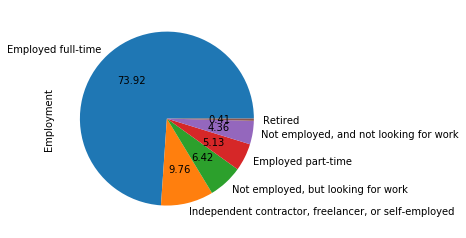

In [11]:
#Pie Chart for the different data of employment records(Freq. depends on type of employment)
data['Employment'].value_counts().plot(kind='pie',autopct="%.02f")

In [12]:
data['Gender'].value_counts().head(5)  #Freq. Dist. Table for the different Gender types

Man                                                        77919
Woman                                                       6344
Non-binary, genderqueer, or gender non-conforming            597
Man;Non-binary, genderqueer, or gender non-conforming        181
Woman;Non-binary, genderqueer, or gender non-conforming      163
Name: Gender, dtype: int64

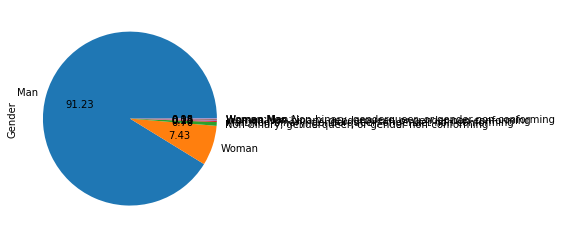

In [13]:
#Pie chart plot for the Different Genders hyst to give ys an idea of the male dominated nature ofthe data.
data['Gender'].value_counts().plot(kind='pie',autopct="%.02f")

**Normally, we can analyze the relation between Gender/Programming Language and Gender with out data but our analysis would be inorrect due to the data being male dominant with 91% men and 9% others, so we are going to skip that.**

In [14]:
#Freq. Dist. Table of the Languages the developers have worked with(TOP 10 MOST POPULAR)
data['LanguageWorkedWith'].value_counts().head(10)

HTML/CSS;JavaScript;PHP;SQL              1483
C#;HTML/CSS;JavaScript;SQL               1414
HTML/CSS;JavaScript                      1247
C#;HTML/CSS;JavaScript;SQL;TypeScript     990
Java                                      934
HTML/CSS;JavaScript;PHP                   910
Python                                    759
HTML/CSS;JavaScript;TypeScript            703
HTML/CSS;Java;JavaScript;SQL              671
C#                                        563
Name: LanguageWorkedWith, dtype: int64

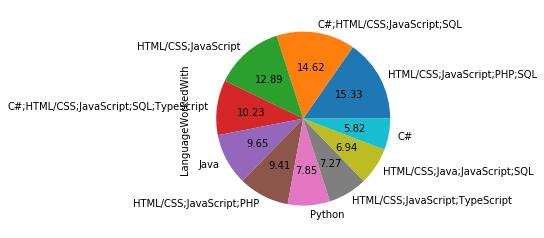

In [15]:
#Pie chart to display the freq. cap of all the TOP 10 most famous languages / lang. combninations
#preffered by the coders of today.
data['LanguageWorkedWith'].value_counts().head(10).plot(kind='pie',autopct="%.02f")

In [16]:
#language desired by these people to work with next year
data['LanguageDesireNextYear'].value_counts().head(10)

Python                                   1236
HTML/CSS;JavaScript                       697
HTML/CSS;JavaScript;TypeScript            648
C#                                        607
Java                                      584
C#;HTML/CSS;JavaScript;SQL                572
C#;HTML/CSS;JavaScript;SQL;TypeScript     568
HTML/CSS;JavaScript;PHP;SQL               548
Go                                        420
HTML/CSS;JavaScript;Python                399
Name: LanguageDesireNextYear, dtype: int64

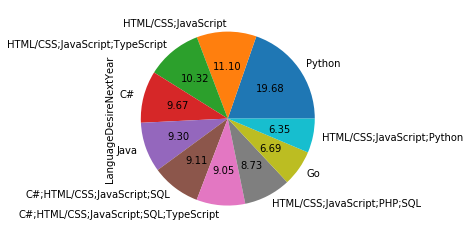

In [17]:
#Pie plot of language desired next year
data['LanguageDesireNextYear'].value_counts().head(10).plot(kind='pie',autopct='%.02f')

**It is quite significant from these no's that Python is the hot favorite by these developers and has the highest no. of votes for their choice to use and learn next year**

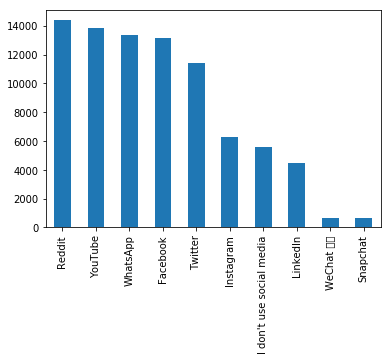

In [28]:
#The most preffered medium of social media for these developers.
data['SocialMedia'].value_counts().head(10).plot(kind='bar')
#We get a better understanding of the people we are dealing with from this graph. Developers top 3 preffered Social Media are
#Reddit(dubbed the smart peoples social media) , Youtube(For getting info,learning as well as entertainment), & 
#Whatsapp(For both personal and proffesional Communication). NOTE: Theres also a good chunk of these people who dont use any social media.

In [18]:
#Freq Dist. Table for the ease of the survey
data['SurveyEase'].value_counts()

Easy                          58613
Neither easy nor difficult    26771
Difficult                      1697
Name: SurveyEase, dtype: int64

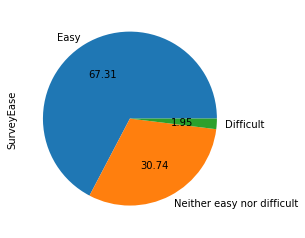

In [20]:
#We Can conclude that the survey was considered easy by majority of the survey takers.
data['SurveyEase'].value_counts().plot(kind='pie',autopct="%.02f")

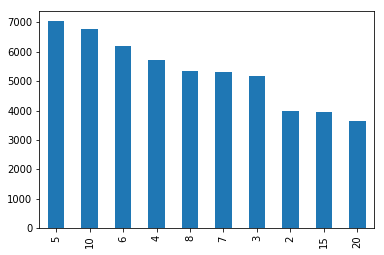

In [26]:
#How many years these developers who took the survey have been coding.
data['YearsCode'].value_counts().head(10).plot(kind='bar')

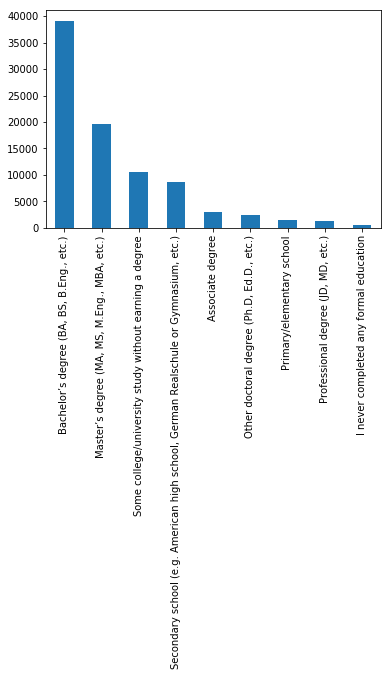

In [30]:
#Education Level of the Developers
data['EdLevel'].value_counts().plot(kind='bar')

**This is a strikingly important feature, previously it was thought proper training from institutions was a necessity to be a good programmer but the trend is shifting at a rapid pace. We notice that a large portion, of our developers have not gone to college or completed any higher degree. Also there are many dropouts among us who are currently developers. Therefore programming can be self taught with effort and dedication.**

In [34]:
#Frequency Distribution of the currencies used by our developers.
data['CurrencySymbol'].value_counts().head(10)

USD    19490
EUR    15386
INR     6690
GBP     4903
CAD     2680
AUD     1624
BRL     1593
PLN     1564
RUB     1349
SEK     1034
Name: CurrencySymbol, dtype: int64

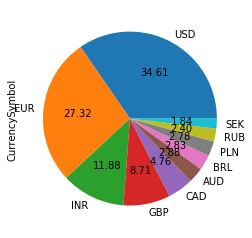

In [38]:
data['CurrencySymbol'].value_counts().head(10).plot(kind='pie',autopct="%.02f")
#Seeing the % of the currencies we get a fair idea about the countries where StackOverflow is widely used, not everyone takes the survey.
#However we can get a rough idea that in USA , Europe and India and UK . These countries host the most no. of the devs who took the survey.


**Conclusion:
We can safely conclude that the Stack Overflow Survey data is a good dataset with lots of features to work on but knowingly we choose these features to keep our analysis simple and compact. We got a fair idea about how the survey ease is fine and its okay to keep the same survey in the future with some tweaks. About how Python is in growing Demand and the hottest language of 2020. About how the no. of developers who havent completed higher education are ever increasing (BOTH FOR HOBBY AND PROFFESIONAL AREAS). About how many of our surveyers are Web Developers and about how Geographical Location affects the likelyhood of finding more developers among many other things. I'll write a proper Medium Article later on regarding my Analysis and link it. Hope you liked my analysis. Thanks a lot.**